In [2]:
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d bhumikatandon/breastcancerdata
!unzip breastcancerdata.zip

Dataset URL: https://www.kaggle.com/datasets/bhumikatandon/breastcancerdata
License(s): apache-2.0
  0% 0.00/1.90k [00:00<?, ?B/s]
100% 1.90k/1.90k [00:00<00:00, 4.06MB/s]
Archive:  breastcancerdata.zip
  inflating: breast-cancer.csv       


# About Dataset
Number of Instances: 286, Number of Attributes: 9+class attribute

Dataset Summary
Shape: 286 rows and 10 columns

Columns: ['target', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irradiat']

Missing Values: No missing values in any column.

Data Types:
Categorical: target, age, menopause, tumor_size, inv_nodes, node_caps, breast, breast_quad, irradiat

Numeric: deg_malig

## Summary Statistics:

target: Two classes (no-recurrence-events, recurrence-events), with no-recurrence-events as the most frequent (201 occurrences).

age: Six age ranges, with 50-59 being the most common (96 occurrences).

menopause: Three categories, with premeno being the most frequent (150 occurrences).

tumor_size: Eleven categories, with 30-34 as the most frequent (60 occurrences).

inv_nodes: Seven categories, with 0-2 dominating (213 occurrences).

node_caps: Predominantly no (222 occurrences).

deg_malig: Ranges from 1 to 3 with a mean of 2.05.

breast: Two categories (left, right), with left being more frequent (152 occurrences).

breast_quad: Six categories, with left_low as the most common (110 occurrences).

irradiat: Two categories (yes, no), with no being more frequent (218 occurrences).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


In [4]:
breast_data=pd.read_csv('/content/breast-cancer.csv')

In [5]:
breast_data.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [6]:
breast_data.shape

(286, 10)

### 286 Rows and 9 Features with 1 Target Column

In [7]:
unique_values = breast_data.apply(lambda col: col.unique())
print(unique_values)

target                 [no-recurrence-events, recurrence-events]
age                   [30-39, 40-49, 60-69, 50-59, 70-79, 20-29]
menopause                                  [premeno, ge40, lt40]
tumor_size     [30-34, 20-24, 15-19, 0-4, 25-29, 50-54, Oct-1...
inv_nodes      [0-2, 06-Aug, 09-Nov, 03-May, 15-17, Dec-14, 2...
node_caps                                           [no, yes, ?]
deg_malig                                              [3, 2, 1]
breast                                             [left, right]
breast_quad    [left_low, right_up, left_up, right_low, centr...
irradiat                                               [no, yes]
dtype: object


In [8]:
breast_data.isna().sum()

,0
target,0
age,0
menopause,0
tumor_size,0
inv_nodes,0
node_caps,0
deg_malig,0
breast,0
breast_quad,0
irradiat,0


Hmmm.. there are some invalid values in tumor size like october ,september...no good


In [9]:
breast_data["tumor_size"].value_counts()

,count
tumor_size,
30-34,60
25-29,54
20-24,50
15-19,30
Oct-14,28
40-44,22
35-39,19
50-54,8
0-4,8


In [10]:
breast_data["age"].value_counts()

,count
age,
50-59,96
40-49,90
60-69,57
30-39,36
70-79,6
20-29,1


<Axes: >

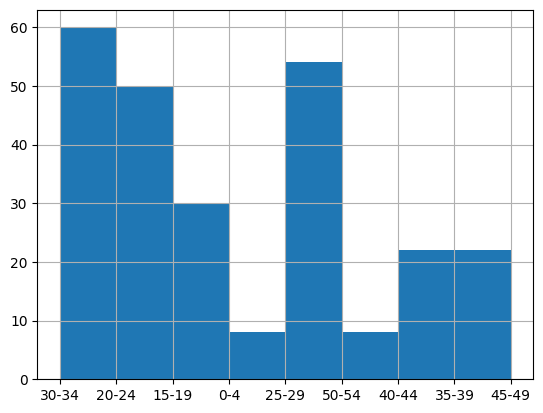

In [11]:
breast_data = breast_data[~breast_data["tumor_size"].isin(["Oct-14", "05-Sep"])]
breast_data["tumor_size"].hist(bins=8)


In [12]:
breast_data.describe()

,deg_malig
count,254.000000
mean,2.110236
std,0.730243
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [13]:
breast_data.duplicated().sum()
breast_data.drop_duplicates(inplace=True)

In [14]:
breast_data.duplicated().sum()

0

In [15]:
breast_data["inv_nodes"].unique()
breast_data = breast_data[~breast_data["inv_nodes"].isin(["06-Aug','09-Nov','03-May','Dec-14"])]

In [16]:
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       242 non-null    object
 1   age          242 non-null    object
 2   menopause    242 non-null    object
 3   tumor_size   242 non-null    object
 4   inv_nodes    242 non-null    object
 5   node_caps    242 non-null    object
 6   deg_malig    242 non-null    int64 
 7   breast       242 non-null    object
 8   breast_quad  242 non-null    object
 9   irradiat     242 non-null    object
dtypes: int64(1), object(9)
memory usage: 20.8+ KB


In [ ]:
breast_data["menopause"].unique()

Model **Training**

In [23]:

breast_data.shape

(242, 10)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(breast_data.drop('target', axis=1), breast_data['target'], test_size=0.2, random_state=42)

In [25]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [26]:
X_test.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,50-59,premeno,20-24,0-2,no,1,left,left_low,no
1,50-59,premeno,25-29,0-2,no,2,left,left_low,no
2,60-69,ge40,15-19,0-2,no,2,left,left_up,yes
3,40-49,premeno,25-29,0-2,no,3,left,left_up,no
4,30-39,premeno,30-34,0-2,no,2,left,left_up,no


In [27]:
le = LabelEncoder()

columns_to_encode = [
    'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps',
    'breast', 'breast_quad', 'irradiat','age'
]

# Encoding categorical columns in the features (X_train, X_test)
for col in columns_to_encode:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    # Fit on the combined train-test data (to avoid data leakage)
    le.fit(np.concatenate((X_train[col], X_test[col]), axis=0))

    # Transform both train and test data
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [28]:
unique_values = X_test.apply(pd.Series.unique)
print(unique_values)


age                        [3, 4, 2, 1, 5]
menopause                           [2, 0]
tumor_size     [2, 3, 1, 4, 8, 7, 6, 5, 0]
inv_nodes                  [0, 1, 3, 2, 5]
node_caps                           [1, 2]
deg_malig                        [1, 2, 3]
breast                              [0, 1]
breast_quad             [2, 3, 1, 4, 5, 0]
irradiat                            [0, 1]
dtype: object


In [29]:
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

In [30]:
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 11],
        'weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}


In [36]:
best_model = None
best_accuracy = 0
best_params = None

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Get the parameter grid for the current model
    grid = param_grid[model_name]

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, n_jobs=-1, verbose=1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Store the best model and hyperparameters
    best_model_for_current = grid_search.best_estimator_
    best_params_for_current = grid_search.best_params_

    # Evaluate on the test set
    y_pred = best_model_for_current.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the classification report for the current model
    print(f"Best Parameters for {model_name}: {best_params_for_current}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_model_for_current
        best_params = best_params_for_current

# After training all models, print the best model and parameters
print("\nBest Model and Parameters:")
print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Training RandomForest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for RandomForest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.7346938775510204
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        33
           1       0.80      0.25      0.38        16

    accuracy                           0.73        49
   macro avg       0.76      0.61      0.61        49
weighted avg       0.75      0.73      0.68        49

Training SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7551020408163265
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        33
           1       0.83      0.31      0.45        16

    accuracy                           0.76        49
   macro avg       0